In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from scipy.stats import gamma, beta
from scipy.special import digamma

In [3]:
from copy import deepcopy

In [4]:
import statsmodels.api as sm

In [5]:
import yfinance as yf

In [6]:
company_ticker = ["MARUTI.NS", "ULTRACEMCO.NS", "HDFCBANK.NS", "ASIANPAINT.NS", "WHIRLPOOL.NS", "HINDUNILVR.NS", "LT.NS", "NESTLEIND.NS", "TCS.NS", "BEL.NS", "ZEEL.NS", "JSWSTEEL.NS", "RELIANCE.NS", "ADANIENT.NS", "BHARTIARTL.NS"]
company_name = ["Maruti Suzuki", "UltraTech Cement", "HDFC Bank", "Asian Paints", "Whirlpool", "Hindustan Unilever", "Larsen & Toubro", "Nestlé", "TCS", "Bharat Electronics", "Zee Entertainment", "JSW Steel Limited", "Reliance", "Adani Enterprises", "Bharti Airtel"]

In [7]:
dat = pd.DataFrame(yf.Ticker(company_ticker[0]).history(period="5y")["Close"])
dat.columns = [company_name[0]]

In [8]:
for i in range(1, len(company_name)):
    dat[company_name[i]] = yf.Ticker(company_ticker[i]).history(period="5y")["Close"]

In [9]:
fourf = pd.read_csv("./Downloads/FourFactors.csv")

In [10]:
dat

,Maruti Suzuki,UltraTech Cement,HDFC Bank,Asian Paints,Whirlpool,Hindustan Unilever,Larsen & Toubro,Nestlé,TCS,Bharat Electronics,Zee Entertainment,JSW Steel Limited,Reliance,Adani Enterprises,Bharti Airtel
Date,,,,,,,,,,,,,,,
2017-11-24,8046.808105,4161.492676,897.744568,1120.760620,1488.578003,1167.662476,1112.182007,6867.325195,1227.619385,53.411964,540.926697,227.171265,922.003174,82.297989,443.174469
2017-11-27,8066.383789,4191.614746,900.726685,1117.764526,1458.342529,1162.451416,1117.886841,6860.003418,1226.614502,53.889240,551.569702,221.774643,922.245483,81.223953,444.244995
2017-11-28,8175.929199,4195.442383,904.508911,1131.779175,1449.193726,1169.415161,1105.975342,6863.251953,1226.363403,53.961559,562.500427,218.990677,914.490295,79.935097,438.892609
2017-11-29,8220.674805,4207.069336,908.363892,1115.203491,1484.810547,1177.070801,1111.588745,6874.831055,1213.963745,54.670238,553.583252,218.648056,917.059265,79.183289,442.237762
2017-11-30,8152.180176,4124.698242,898.859802,1108.341187,1524.145996,1173.657959,1110.402222,7014.929688,1204.304810,53.744610,544.761963,218.305435,893.357239,78.726830,442.862274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18,8848.049805,6814.450195,1613.900024,3095.500000,1522.699951,2483.699951,2024.449951,19925.099609,3343.449951,107.349998,250.850006,708.200012,2597.649902,4019.800049,837.299988
2022-11-21,8865.200195,6754.850098,1597.349976,3095.300049,1497.000000,2501.399902,2011.449951,19761.699219,3283.500000,105.800003,247.100006,696.549988,2550.899902,4001.850098,851.200012
2022-11-22,8873.750000,6843.049805,1595.000000,3103.850098,1497.699951,2515.699951,2029.800049,19613.500000,3314.949951,107.449997,252.000000,708.250000,2565.050049,4034.000000,847.599976


In [11]:
fourf['Date'] = pd.to_datetime(fourf['Date'])  
fourf = fourf.set_index(['Date'])

In [12]:
fourf.head()

,SMB,HML,WML,MF,RF
Date,,,,,
1993-10-01,1.557011,1.242265,-0.439199,NaN,NaN
1993-10-04,0.441723,0.342366,-0.604401,-0.943991,0.022014
1993-10-05,0.020237,0.882847,-0.839673,-0.297380,0.022014
1993-10-06,-0.058198,-1.644238,0.152324,-0.324258,0.022014
1993-10-07,-0.305982,0.227731,-0.055639,0.396895,0.022014


In [13]:
dat.head()

,Maruti Suzuki,UltraTech Cement,HDFC Bank,Asian Paints,Whirlpool,Hindustan Unilever,Larsen & Toubro,Nestlé,TCS,Bharat Electronics,Zee Entertainment,JSW Steel Limited,Reliance,Adani Enterprises,Bharti Airtel
Date,,,,,,,,,,,,,,,
2017-11-24,8046.808105,4161.492676,897.744568,1120.760620,1488.578003,1167.662476,1112.182007,6867.325195,1227.619385,53.411964,540.926697,227.171265,922.003174,82.297989,443.174469
2017-11-27,8066.383789,4191.614746,900.726685,1117.764526,1458.342529,1162.451416,1117.886841,6860.003418,1226.614502,53.889240,551.569702,221.774643,922.245483,81.223953,444.244995
2017-11-28,8175.929199,4195.442383,904.508911,1131.779175,1449.193726,1169.415161,1105.975342,6863.251953,1226.363403,53.961559,562.500427,218.990677,914.490295,79.935097,438.892609
2017-11-29,8220.674805,4207.069336,908.363892,1115.203491,1484.810547,1177.070801,1111.588745,6874.831055,1213.963745,54.670238,553.583252,218.648056,917.059265,79.183289,442.237762
2017-11-30,8152.180176,4124.698242,898.859802,1108.341187,1524.145996,1173.657959,1110.402222,7014.929688,1204.304810,53.744610,544.761963,218.305435,893.357239,78.726830,442.862274


In [14]:
ret = dat.pct_change()[1:]
ret.head()

,Maruti Suzuki,UltraTech Cement,HDFC Bank,Asian Paints,Whirlpool,Hindustan Unilever,Larsen & Toubro,Nestlé,TCS,Bharat Electronics,Zee Entertainment,JSW Steel Limited,Reliance,Adani Enterprises,Bharti Airtel
Date,,,,,,,,,,,,,,,
2017-11-27,0.002433,0.007238,0.003322,-0.002673,-0.020312,-0.004463,0.005129,-0.001066,-0.000819,0.008936,0.019676,-0.023756,0.000263,-0.013051,0.002416
2017-11-28,0.013580,0.000913,0.004199,0.012538,-0.006273,0.005991,-0.010655,0.000474,-0.000205,0.001342,0.019817,-0.012553,-0.008409,-0.015868,-0.012048
2017-11-29,0.005473,0.002771,0.004262,-0.014646,0.024577,0.006547,0.005076,0.001687,-0.010111,0.013133,-0.015853,-0.001565,0.002809,-0.009405,0.007622
2017-11-30,-0.008332,-0.019579,-0.010463,-0.006153,0.026492,-0.002899,-0.001067,0.020378,-0.007957,-0.016931,-0.015935,-0.001567,-0.025846,-0.005765,0.001412
2017-12-01,0.001151,-0.004484,-0.002967,-0.011336,-0.015023,-0.017250,-0.004028,0.004300,-0.002673,-0.006997,-0.019977,-0.010987,-0.012425,-0.028991,-0.024776


In [15]:
fourf = fourf.loc[ret.index.intersection(fourf.index)]
ret = ret.loc[ret.index.intersection(fourf.index)]

In [16]:
fourf_train = fourf.loc[ret.index < ret.index[int(len(ret.index)*0.6)]]
fourf_test = fourf.loc[ret.index >= ret.index[int(len(ret.index)*0.6)]]
ret_train = ret.loc[ret.index < ret.index[int(len(ret.index)*0.6)]]
ret_test = ret.loc[ret.index >= ret.index[int(len(ret.index)*0.6)]]

In [17]:
def solve_robust(ret_train, fourf_train, verbose=True):
    p = ret_train.shape[0]
    m = fourf_train.shape[1]
    n = ret_train.shape[1]
    
    from sklearn.linear_model import LinearRegression
    mean0 = []
    V0 = []
    errors = []
    for i in range(ret_train.shape[1]):
        reg = LinearRegression().fit(fourf_train, ret_train.iloc[:,i])
        V0.append(reg.coef_)
        mean0.append(reg.intercept_)
        errors.append(ret_train.iloc[:,i] - reg.predict(fourf_train))
    mean0 = np.array(mean0)
    V0 = np.array(V0).T
    errors = np.array(errors).T
    w = 0.95
    F = np.cov(fourf_train.T)
    B = fourf_train.T.values
    B1 = B @ np.ones(B.shape[1])
    G = B @ B.T - 1/p * np.outer(B1,B1)
    G_root = np.linalg.cholesky(G)
    H = np.linalg.inv(G_root)@ F @ G_root
    A = sm.add_constant(B.T)
    from scipy.stats import f
    s2 = np.sum(np.square(errors),axis=0) / (p - m - 1)
    gam = np.sqrt((m+1) * (np.linalg.inv(A.T @ A))[0][0] * f.ppf(w,m+1,p-m-1) * s2)
    rho = np.sqrt((m+1) * f.ppf(w,m+1,p-m-1) * s2)
    lam, Q = np.linalg.eig(H)
    lam_max = lam.max()
    H_root = np.linalg.cholesky(H)
    wM = Q.T @ H_root @ G_root @ V0
    D_bar = np.diag(s2)
    D_root = np.linalg.cholesky(D_bar)
    
    #define the variables
    import cvxpy as cp
    nu = cp.Variable(1)
    delt = cp.Variable(1)
    phi = cp.Variable(n)
    psi = cp.Variable(n)
    tau = cp.Variable(1)
    t = cp.Variable(m)
    sig = cp.Variable(1)
    #define the constraints
    cons = [
    cp.SOC(1 + delt, cp.hstack([2 * D_root @ phi, 1 - delt])),
    np.ones(n).T @ phi == 1,
    sig >= 0,
    tau >= 0,
    tau + np.ones(m).T @ t <= nu,
    cp.SOC(delt + tau, cp.hstack([2 * rho.T @ psi, sig - tau])),
    sig <= 1 / lam_max]
    cons += [psi[i] >= phi[i] for i in range(n)] + [psi[i] >= -phi[i] for i in range(n)] + [t[i] >= 0 for i in range(m)] + [cp.SOC(1 - sig * lam[i] + t[i], cp.hstack([2 * (wM @ phi)[i], 1 - sig*lam[i] - t[i]])) for i in range(m)]
    #Results
    prob = cp.Problem(cp.Minimize(nu + delt), cons)
    prob.solve(solver='ECOS', abstol=1e-5)
    
    if verbose:
        print("Problem Status: ", prob.status)
        print("Optimal Value: ", prob.value)
        print("Optimal Portfolio: ", phi.value)
    
    return prob, phi

In [18]:
solve_robust(ret_train,fourf_train)

Problem Status:  optimal
Optimal Value:  0.1526912419512142
Optimal Portfolio:  [2.14215755e-08 7.16675764e-08 6.95934137e-01 3.57342855e-06
 9.55741742e-08 2.72949003e-02 4.35780923e-07 2.76766498e-01
 1.64209985e-07 3.20704327e-08 1.42135977e-08 1.21074070e-08
 1.27900624e-08 6.16968238e-09 2.48952364e-08]


(Problem(Minimize(Expression(AFFINE, UNKNOWN, (1,))), [SOC(Expression(AFFINE, UNKNOWN, (1,))), Equality(Expression(AFFINE, UNKNOWN, ()), Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, (1,))), SOC(Expression(AFFINE, UNKNOWN, (1,))), Inequality(Variable((1,))), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Expression(AFFINE, UNKNOWN, ()

In [19]:
from sklearn.metrics import xc
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AffinityPropagation

In [20]:
def cluster_num(model, max_clusters = -1):
    ls = [[i,0] for i in range(2,max_clusters+1)]
    X = np.c_[ret_train,fourf_train]
    for i in ls:
        if max_clusters == -1:
            mod = model()
        else:
            mod = model(i[0])
        labels = mod.fit(X).predict(X)
    #     plt.scatter(u[:, 0], u[:, 1], c=labels, s=40, cmap='viridis');
        ls[i[0]-2][1] = calinski_harabasz_score(X,labels)
    plt.scatter([i[0] for i in ls], [i[1] for i in ls])

Text(0, 0.5, 'calinski harabasz score')

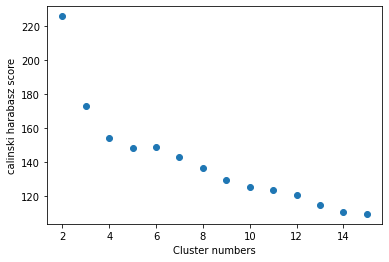

In [68]:
cluster_num(KMeans,15)
plt.xlabel("Cluster numbers")
plt.ylabel("calinski harabasz score")

Text(0, 0.5, 'calinski harabasz score')

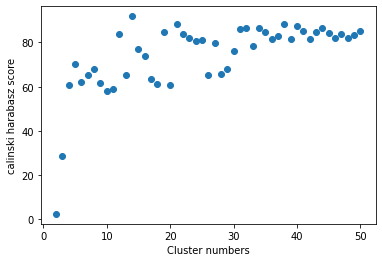

In [69]:
from sklearn.mixture import GaussianMixture as GMM
cluster_num(GMM,50)
plt.xlabel("Cluster numbers")
plt.ylabel("calinski harabasz score")

In [32]:
X = np.c_[ret_train,fourf_train]

In [34]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]:
    labels = DBSCAN(eps=i).fit(X).labels_
    if len(set(labels)) > 1:
        print(i, len(set(labels)), calinski_harabasz_score(X,labels))
    else:
        print(i, ":(")

0.1 :(
0.2 :(
0.3 4 1.237764576495861
0.4 7 2.1439479944630895
0.5 4 2.3467749943851426
0.6 5 4.6680478831085495
0.7 2 2.706077105596275
0.8 2 3.5634064884157772
0.9 2 4.7707197540421165
1 2 4.172739826747254
2 2 2.299812378575727
3 2 14.556718411993783
4 2 17.568279959992054
5 :(
6 :(
7 :(
8 :(
9 :(
10 :(


In [35]:
labels = AffinityPropagation(random_state=5).fit(X).labels_
calinski_harabasz_score(X,labels)

83.56807133827527

In [36]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]:
    labels = OPTICS(eps=i).fit(X).labels_
    if len(set(labels)) > 1:
        print(i, len(set(labels)), calinski_harabasz_score(X,labels))
    else:
        print(i, ":(")

0.1 13 3.1552584861599557
0.2 13 3.1552584861599557
0.3 13 3.1552584861599557
0.4 13 3.1552584861599557
0.5 13 3.1552584861599557
0.6 13 3.1552584861599557
0.7 13 3.1552584861599557
0.8 13 3.1552584861599557
0.9 13 3.1552584861599557
1 13 3.1552584861599557
2 13 3.1552584861599557
3 13 3.1552584861599557
4 13 3.1552584861599557
5 13 3.1552584861599557
6 13 3.1552584861599557
7 13 3.1552584861599557
8 13 3.1552584861599557
9 13 3.1552584861599557
10 13 3.1552584861599557


In [39]:
from sklearn.mixture import GaussianMixture as GMM

In [ ]:
plt.xlabel("Cluster numbers")
plt.ylabel("calinski harabasz score")

In [43]:
labels_km = KMeans(2).fit(X).predict(X)
labels_gmm = GMM(2).fit(X).predict(X)
labels_db =  DBSCAN(eps=4).fit(X).labels_
labels_op = OPTICS().fit(X).labels_
labels_ap = AffinityPropagation(random_state=5).fit(X).labels_

In [44]:
min_train_size = 20
for labels in [labels_km, labels_gmm, labels_db, labels_op, labels_ap]:
    for i in set(labels):
        if sum(labels == i) > min_train_size:
            print(X[labels == i,:].shape)
    print("#############################")

(340, 20)
(303, 20)
#############################
(81, 20)
(562, 20)
#############################
(639, 20)
#############################
(553, 20)
#############################
(22, 20)
(42, 20)
(22, 20)
(22, 20)
(29, 20)
(33, 20)
(29, 20)
(21, 20)
(23, 20)
#############################


In [45]:
max_risk = -10000
max_risk_w = []
for i in set(labels):
    if sum(labels == i) > min_train_size:
        sol, phi = solve_robust(ret_train.iloc[labels == i,:], fourf_train.iloc[labels == i,:],False)
        if sol.value > max_risk:
            max_risk = sol.value
            max_risk_w = phi.value

In [46]:
min_train_size = 20
portfolios = [("Normal", solve_robust(ret_train, fourf_train,False)[1].value)]
methods = ["Kmeans", "GMM", "DBSCAN", "OPTICS", "AP"]
for method, labels in zip(methods, [labels_km, labels_gmm, labels_db, labels_op, labels_ap]):
    max_risk = -10000
    max_risk_w = []
    for i in set(labels):
        if sum(labels == i) > min_train_size:
            sol, phi = solve_robust(ret_train.iloc[labels == i,:], fourf_train.iloc[labels == i,:],False)
            if sol.value > max_risk:
                max_risk = sol.value
                max_risk_w = phi.value
    portfolios.append((method, max_risk_w))

In [47]:
rf = 3.54 / 252 * 0.01

In [48]:
for method, w in portfolios:
    print(method)
    print("    Portfolio Return: ", (ret_test @ w).mean())
    print("    Portfolio Risk: ", (ret_test @ w).std())
    print("    Sharpe: ", ((ret_test @ w).mean() - rf)/(ret_test @ w).std())

Normal
    Portfolio Return:  0.0006132443810724119
    Portfolio Risk:  0.012373917644362966
    Sharpe:  0.038206831836447096
Kmeans
    Portfolio Return:  -4.95155225437534e-05
    Portfolio Risk:  0.013085798437973932
    Sharpe:  -0.014518924001504048
GMM
    Portfolio Return:  0.0004890303157187007
    Portfolio Risk:  0.01086634265658955
    Sharpe:  0.03207648941855709
DBSCAN
    Portfolio Return:  0.0007959892053534007
    Portfolio Risk:  0.016024282190502184
    Sharpe:  0.040907480727326556
OPTICS
    Portfolio Return:  0.0006589808725910113
    Portfolio Risk:  0.011039360422816016
    Sharpe:  0.04696872484054253
AP
    Portfolio Return:  0.0008042477168342649
    Portfolio Risk:  0.016153168887129785
    Sharpe:  0.04109234113728246


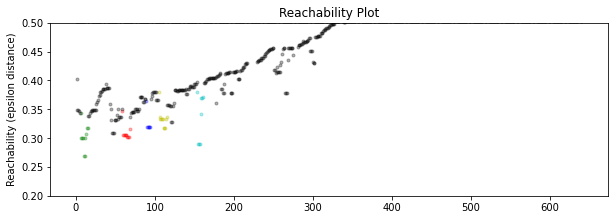

In [70]:
clust = OPTICS()
clust.fit(X)
plt.figure(figsize=(10, 7))
import matplotlib.gridspec as gridspec
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax1.set_ylim([0.2, 0.5])

colors = ["g.", "r.", "b.", "y.", "c."]
space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")
plt.show()